# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
#from keras import optimizers

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定

LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Optimizers = {'SGD': keras.optimizers.SGD, 
             'Adagrad': keras.optimizers.Adagrad,  
             'RMSprop': keras.optimizers.RMSprop, 
             'Adam': keras.optimizers.Adam}

In [7]:
results = {}

for opt_name, opt in Optimizers.items():
    for lr in LEARNING_RATE:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print("Experiment with LR = %.6f, Optimizers= %s" % (lr, opt_name))
        model = build_mlp(input_shape=x_train.shape[1:])
        model.summary()
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=opt(lr=lr))
        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)
    
        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["acc"]
        valid_acc = model.history.history["val_acc"]
    
        exp_name_tag = "opt-%s-lr-%.6f" % (opt_name, lr)
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}


W0717 21:39:31.523816 13904 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0717 21:39:31.523816 13904 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0717 21:39:31.539467 13904 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0717 21:39:31.539467 13904 deprecation_wrapper.py:119] From C:\Users\pablo\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0717 21:39:31.539467 13904 

Experiment with LR = 0.100000, Optimizers= SGD
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

Epoch 1/50
50000/50000 [==============================] - 3s 50us/step - loss: 2.0902 - acc: 0.2485 - val_loss: 1.9740 - val_acc: 0.2902
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9056 - acc: 0.3288 - val_loss: 1.8930 - val_acc: 0.3364
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.8225 - acc: 0.3573 - val_loss: 1.8238 - val_acc: 0.3494
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7715 - acc: 0.3739 - val_loss: 1.7553 - val_acc: 0.3785
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7352 - acc: 0.3891 - val_loss: 1.7533 - val_acc: 0.3851
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7002 - acc: 0.4016 - val_loss: 1.7247 - val_acc: 0.3868
Epoch 7/50
50000/50000 [==============================] - 2s 44us/step - loss: 1.6734 - acc: 0.4112 - val_loss: 1.7154 - val_acc: 0.3913
Epoch 8/50
50000/50000 [=================

50000/50000 [==============================] - 2s 46us/step - loss: 2.1596 - acc: 0.2223 - val_loss: 2.1314 - val_acc: 0.2391
Epoch 3/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.1094 - acc: 0.2563 - val_loss: 2.0876 - val_acc: 0.2576
Epoch 4/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.0688 - acc: 0.2731 - val_loss: 2.0502 - val_acc: 0.2792
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.0348 - acc: 0.2890 - val_loss: 2.0195 - val_acc: 0.2920
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.0056 - acc: 0.2995 - val_loss: 1.9926 - val_acc: 0.3058
Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.9804 - acc: 0.3097 - val_loss: 1.9697 - val_acc: 0.3099
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.9584 - acc: 0.3164 - val_loss: 1.9490 - val_acc: 0.3182
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 2s 46us/step - loss: 2.2818 - acc: 0.1368 - val_loss: 2.2707 - val_acc: 0.1447
Epoch 4/50
50000/50000 [==============================] - 2s 47us/step - loss: 2.2658 - acc: 0.1566 - val_loss: 2.2563 - val_acc: 0.1643
Epoch 5/50
50000/50000 [==============================] - 2s 46us/step - loss: 2.2523 - acc: 0.1741 - val_loss: 2.2436 - val_acc: 0.1795
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2402 - acc: 0.1843 - val_loss: 2.2322 - val_acc: 0.1887
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2291 - acc: 0.1934 - val_loss: 2.2215 - val_acc: 0.1956
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2187 - acc: 0.2013 - val_loss: 2.2114 - val_acc: 0.2032
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2088 - acc: 0.2076 - val_loss: 2.2019 - val_acc: 0.2092
Epoch 10/50
50000/50000 [===========================

50000/50000 [==============================] - 2s 45us/step - loss: 2.3186 - acc: 0.1166 - val_loss: 2.3168 - val_acc: 0.1202
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3138 - acc: 0.1200 - val_loss: 2.3122 - val_acc: 0.1211
Epoch 6/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3093 - acc: 0.1223 - val_loss: 2.3078 - val_acc: 0.1233
Epoch 7/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3053 - acc: 0.1257 - val_loss: 2.3039 - val_acc: 0.1248
Epoch 8/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.3015 - acc: 0.1282 - val_loss: 2.3002 - val_acc: 0.1282
Epoch 9/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2980 - acc: 0.1302 - val_loss: 2.2968 - val_acc: 0.1313
Epoch 10/50
50000/50000 [==============================] - 2s 45us/step - loss: 2.2947 - acc: 0.1328 - val_loss: 2.2936 - val_acc: 0.1337
Epoch 11/50
50000/50000 [==========================

50000/50000 [==============================] - 3s 52us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 3s 51us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [===========

Epoch 6/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 2s 50us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 10/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 

Epoch 7/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5974 - acc: 0.4423 - val_loss: 1.6481 - val_acc: 0.4158
Epoch 8/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5789 - acc: 0.4467 - val_loss: 1.5976 - val_acc: 0.4316
Epoch 9/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5595 - acc: 0.4537 - val_loss: 1.6275 - val_acc: 0.4250
Epoch 10/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5420 - acc: 0.4608 - val_loss: 1.5769 - val_acc: 0.4391
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5276 - acc: 0.4654 - val_loss: 1.6017 - val_acc: 0.4320
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.5122 - acc: 0.4706 - val_loss: 1.5319 - val_acc: 0.4546
Epoch 13/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5018 - acc: 0.4747 - val_loss: 1.5359 - val_acc: 0.4490
Epoch 14/50
50000/50000 [============

50000/50000 [==============================] - 2s 47us/step - loss: 1.8215 - acc: 0.3707 - val_loss: 1.8251 - val_acc: 0.3687
Epoch 9/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.8114 - acc: 0.3748 - val_loss: 1.8159 - val_acc: 0.3750
Epoch 10/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.8022 - acc: 0.3776 - val_loss: 1.8086 - val_acc: 0.3741
Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.7940 - acc: 0.3802 - val_loss: 1.8001 - val_acc: 0.3754
Epoch 12/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.7866 - acc: 0.3825 - val_loss: 1.7931 - val_acc: 0.3798
Epoch 13/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7800 - acc: 0.3855 - val_loss: 1.7862 - val_acc: 0.3838
Epoch 14/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.7739 - acc: 0.3860 - val_loss: 1.7810 - val_acc: 0.3841
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 2s 48us/step - loss: 2.1495 - acc: 0.2692 - val_loss: 2.1436 - val_acc: 0.2810
Epoch 10/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1420 - acc: 0.2723 - val_loss: 2.1364 - val_acc: 0.2810
Epoch 11/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.1351 - acc: 0.2739 - val_loss: 2.1297 - val_acc: 0.2835
Epoch 12/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1287 - acc: 0.2753 - val_loss: 2.1235 - val_acc: 0.2869
Epoch 13/50
50000/50000 [==============================] - 2s 49us/step - loss: 2.1227 - acc: 0.2771 - val_loss: 2.1177 - val_acc: 0.2873
Epoch 14/50
50000/50000 [==============================] - 2s 50us/step - loss: 2.1170 - acc: 0.2798 - val_loss: 2.1121 - val_acc: 0.2888
Epoch 15/50
50000/50000 [==============================] - 2s 48us/step - loss: 2.1116 - acc: 0.2814 - val_loss: 2.1068 - val_acc: 0.2900
Epoch 16/50
50000/50000 [=====================

50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 48us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 2s 49us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [=======

Epoch 11/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 2s 47us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50

Epoch 12/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.4112 - acc: 0.4971 - val_loss: 1.6571 - val_acc: 0.4140
Epoch 13/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3753 - acc: 0.5094 - val_loss: 1.5432 - val_acc: 0.4568
Epoch 14/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.3575 - acc: 0.5156 - val_loss: 1.4660 - val_acc: 0.4791
Epoch 15/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3327 - acc: 0.5251 - val_loss: 1.5486 - val_acc: 0.4599
Epoch 16/50
50000/50000 [==============================] - 2s 49us/step - loss: 1.3131 - acc: 0.5334 - val_loss: 1.7845 - val_acc: 0.4111
Epoch 17/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2938 - acc: 0.5411 - val_loss: 1.5105 - val_acc: 0.4651
Epoch 18/50
50000/50000 [==============================] - 2s 48us/step - loss: 1.2710 - acc: 0.5485 - val_loss: 1.5785 - val_acc: 0.4500
Epoch 19/50
50000/50000 [=========

50000/50000 [==============================] - 3s 51us/step - loss: 1.4019 - acc: 0.5063 - val_loss: 1.4916 - val_acc: 0.4673
Epoch 14/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3843 - acc: 0.5126 - val_loss: 1.4465 - val_acc: 0.4811
Epoch 15/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3623 - acc: 0.5205 - val_loss: 1.4438 - val_acc: 0.4732
Epoch 16/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3464 - acc: 0.5234 - val_loss: 1.5064 - val_acc: 0.4634
Epoch 17/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.3309 - acc: 0.5311 - val_loss: 1.5073 - val_acc: 0.4676
Epoch 18/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.3122 - acc: 0.5378 - val_loss: 1.4699 - val_acc: 0.4775
Epoch 19/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.2982 - acc: 0.5433 - val_loss: 1.4640 - val_acc: 0.4702
Epoch 20/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 53us/step - loss: 1.6377 - acc: 0.4310 - val_loss: 1.6433 - val_acc: 0.4289
Epoch 15/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.6260 - acc: 0.4345 - val_loss: 1.6353 - val_acc: 0.4236
Epoch 16/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.6157 - acc: 0.4368 - val_loss: 1.6213 - val_acc: 0.4352
Epoch 17/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.6054 - acc: 0.4431 - val_loss: 1.6140 - val_acc: 0.4369
Epoch 18/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5959 - acc: 0.4447 - val_loss: 1.6110 - val_acc: 0.4361
Epoch 19/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.5868 - acc: 0.4494 - val_loss: 1.6011 - val_acc: 0.4369
Epoch 20/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.5783 - acc: 0.4506 - val_loss: 1.5952 - val_acc: 0.4431
Epoch 21/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [=======

Epoch 16/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 3s 54us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 3s 53us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50

Epoch 17/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.1941 - acc: 0.5733 - val_loss: 1.3427 - val_acc: 0.5307
Epoch 18/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.1589 - acc: 0.5850 - val_loss: 1.3578 - val_acc: 0.5231
Epoch 19/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.1432 - acc: 0.5896 - val_loss: 1.3663 - val_acc: 0.5241
Epoch 20/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.1286 - acc: 0.5982 - val_loss: 1.3651 - val_acc: 0.5211
Epoch 21/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1103 - acc: 0.6025 - val_loss: 1.3728 - val_acc: 0.5196
Epoch 22/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.0897 - acc: 0.6108 - val_loss: 1.3781 - val_acc: 0.5194
Epoch 23/50
50000/50000 [==============================] - 3s 53us/step - loss: 1.0738 - acc: 0.6166 - val_loss: 1.3913 - val_acc: 0.5148
Epoch 24/50
50000/50000 [=========

50000/50000 [==============================] - 3s 53us/step - loss: 1.2207 - acc: 0.5714 - val_loss: 1.3722 - val_acc: 0.5098
Epoch 19/50
50000/50000 [==============================] - 3s 56us/step - loss: 1.2038 - acc: 0.5797 - val_loss: 1.3455 - val_acc: 0.5199
Epoch 20/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1851 - acc: 0.5848 - val_loss: 1.3681 - val_acc: 0.5179
Epoch 21/50
50000/50000 [==============================] - 3s 52us/step - loss: 1.1752 - acc: 0.5891 - val_loss: 1.3635 - val_acc: 0.5194
Epoch 22/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1566 - acc: 0.5961 - val_loss: 1.3644 - val_acc: 0.5157
Epoch 23/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1450 - acc: 0.5977 - val_loss: 1.3420 - val_acc: 0.5264
Epoch 24/50
50000/50000 [==============================] - 3s 51us/step - loss: 1.1352 - acc: 0.6034 - val_loss: 1.3381 - val_acc: 0.5253
Epoch 25/50
50000/50000 [=====================

50000/50000 [==============================] - 3s 54us/step - loss: 1.5450 - acc: 0.4631 - val_loss: 1.5626 - val_acc: 0.4558
Epoch 20/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5360 - acc: 0.4651 - val_loss: 1.5579 - val_acc: 0.4547
Epoch 21/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5268 - acc: 0.4697 - val_loss: 1.5481 - val_acc: 0.4614
Epoch 22/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5180 - acc: 0.4750 - val_loss: 1.5483 - val_acc: 0.4553
Epoch 23/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5117 - acc: 0.4751 - val_loss: 1.5326 - val_acc: 0.4668
Epoch 24/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.5022 - acc: 0.4781 - val_loss: 1.5308 - val_acc: 0.4644
Epoch 25/50
50000/50000 [==============================] - 3s 54us/step - loss: 1.4949 - acc: 0.4812 - val_loss: 1.5223 - val_acc: 0.4671
Epoch 26/50
50000/50000 [=====================

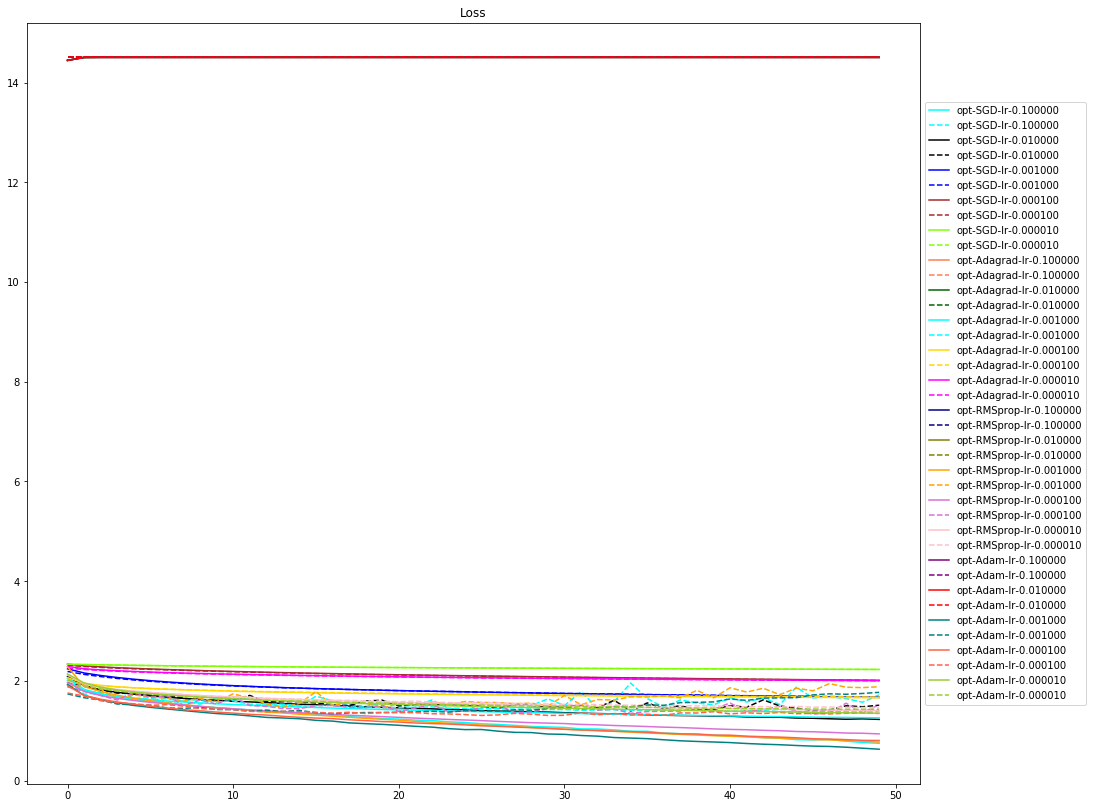

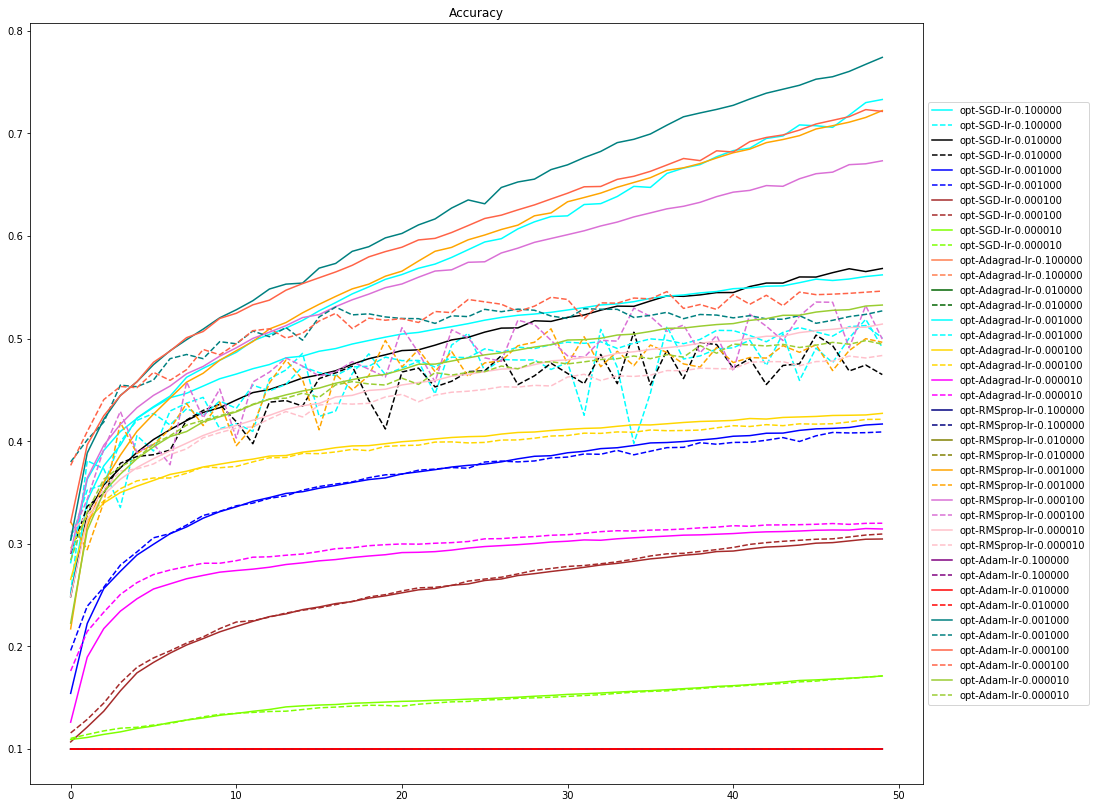

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["aqua", "black", "blue", "brown", "chartreuse", "coral", "darkgreen", "cyan", "gold", "magenta", "navy", "olive", "orange", "orchid", "pink", "purple", "red",  "teal", "tomato", "yellowgreen"]

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(16,14))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()